<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/uciml/glass/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

import random
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Dataset/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.duplicated().sum()

1

In [5]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df['Type'].value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<h2>EDA</h2>

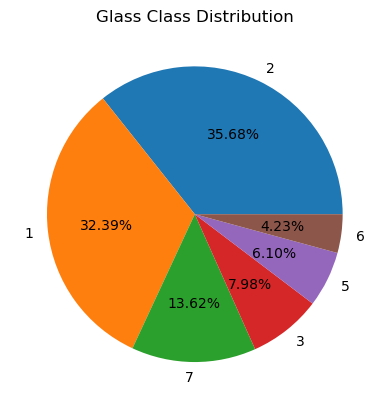

In [9]:
plt.pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.2f%%')
plt.title('Glass Class Distribution')
plt.show();

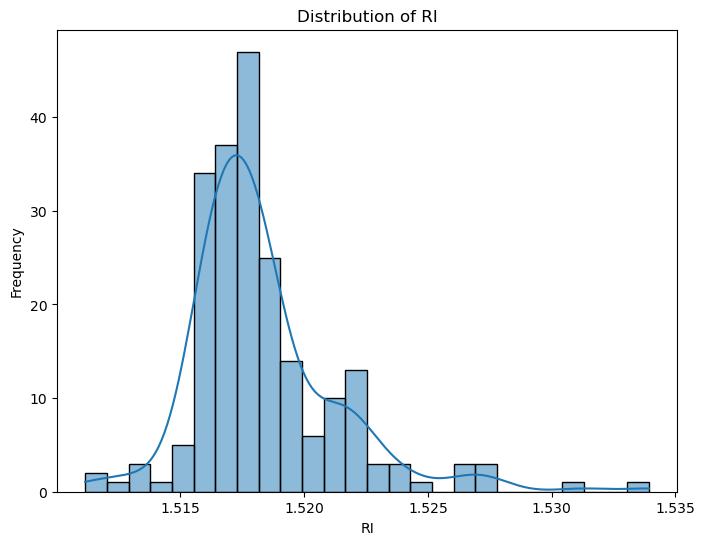

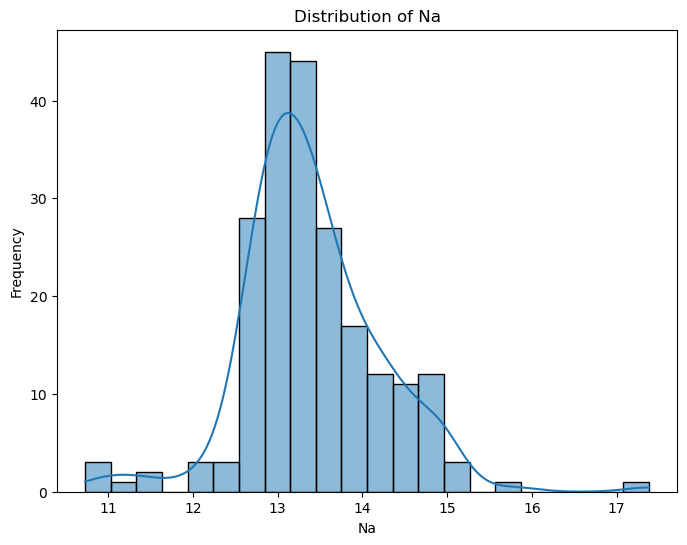

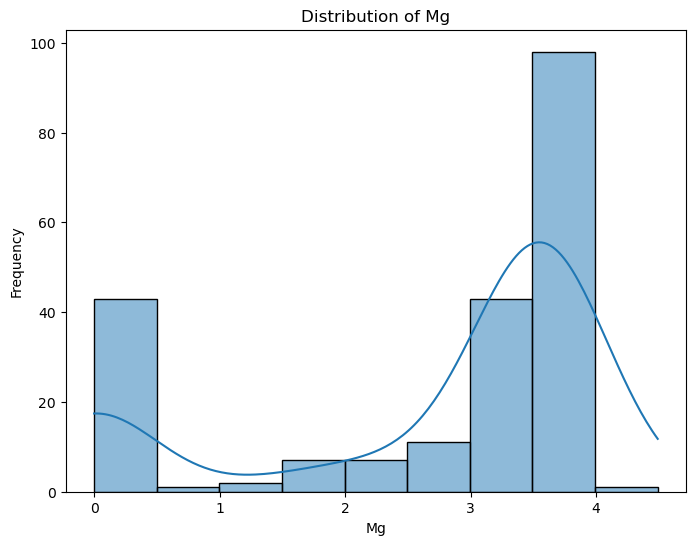

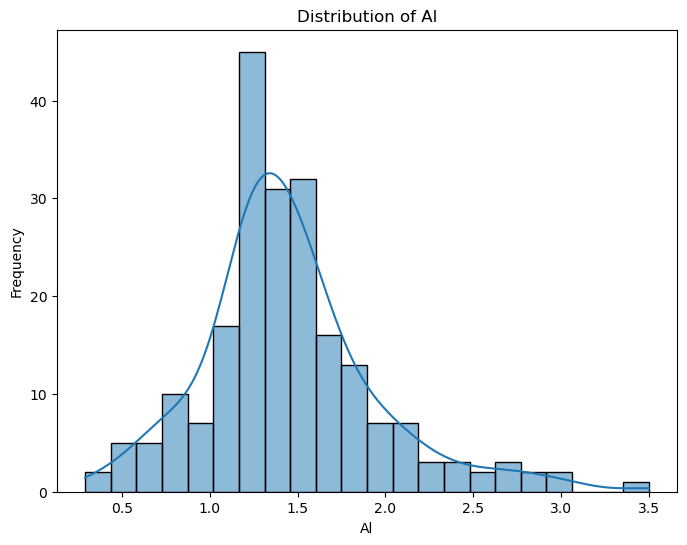

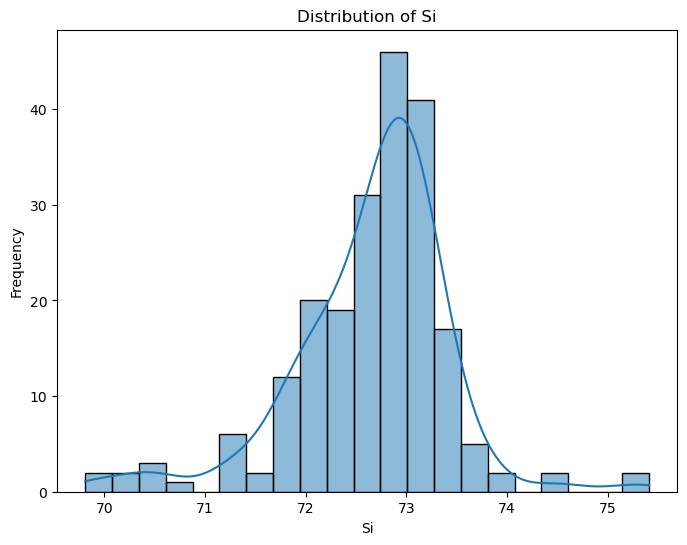

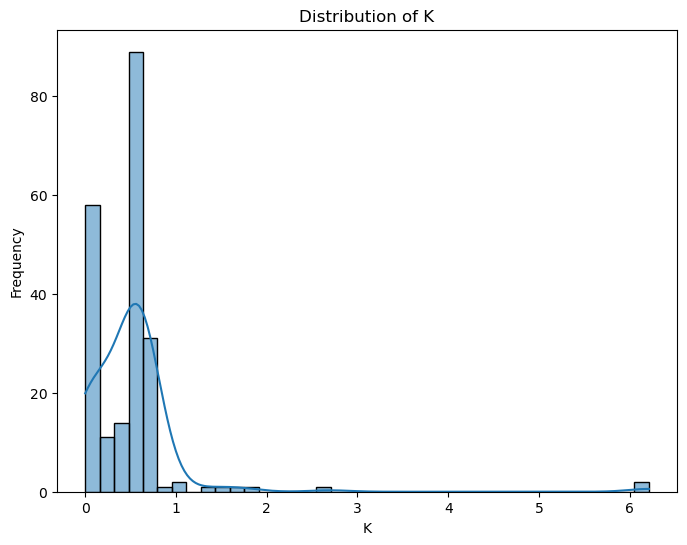

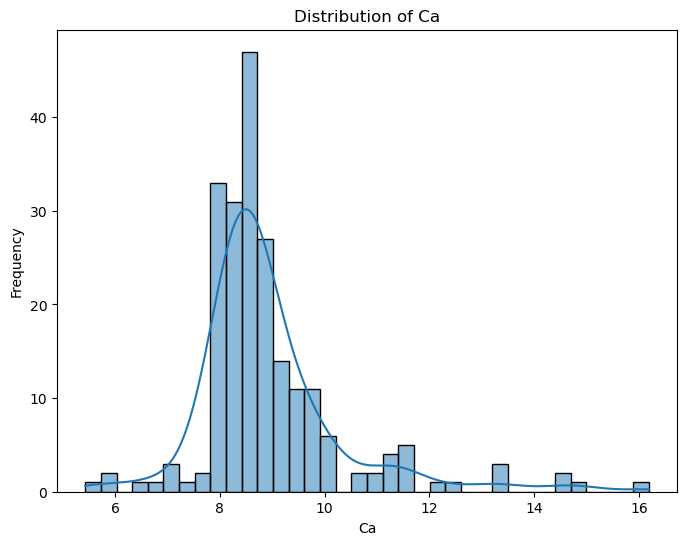

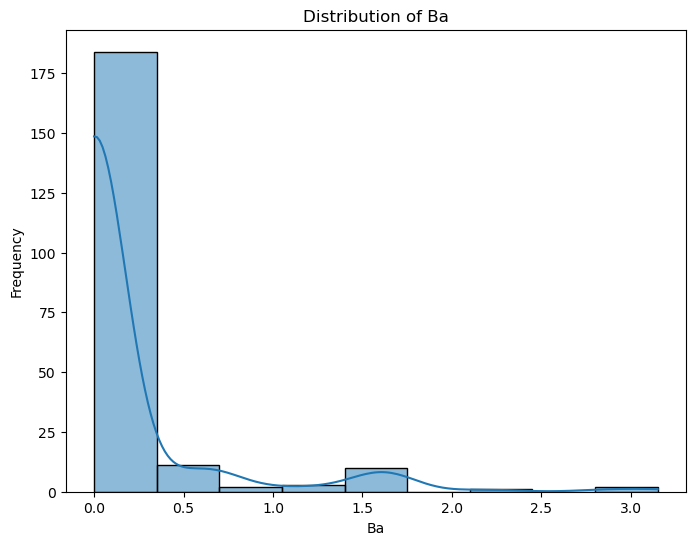

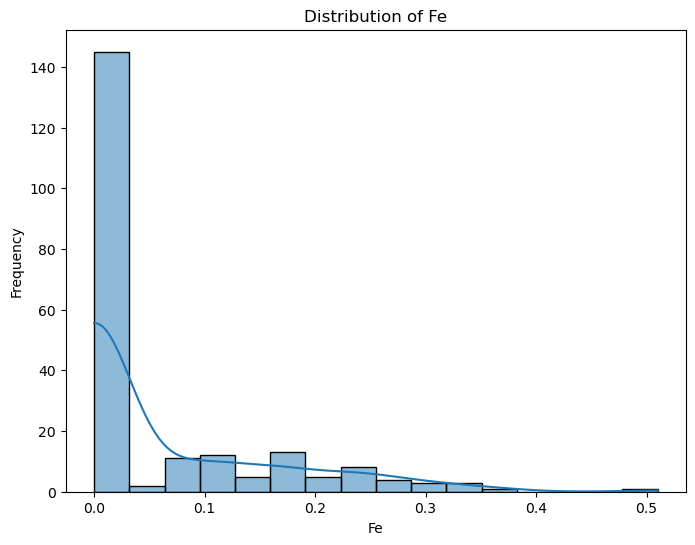

In [10]:
df_numeric = df.drop('Type', axis=1)

# Plot histograms for each numeric column
for col in df_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show();

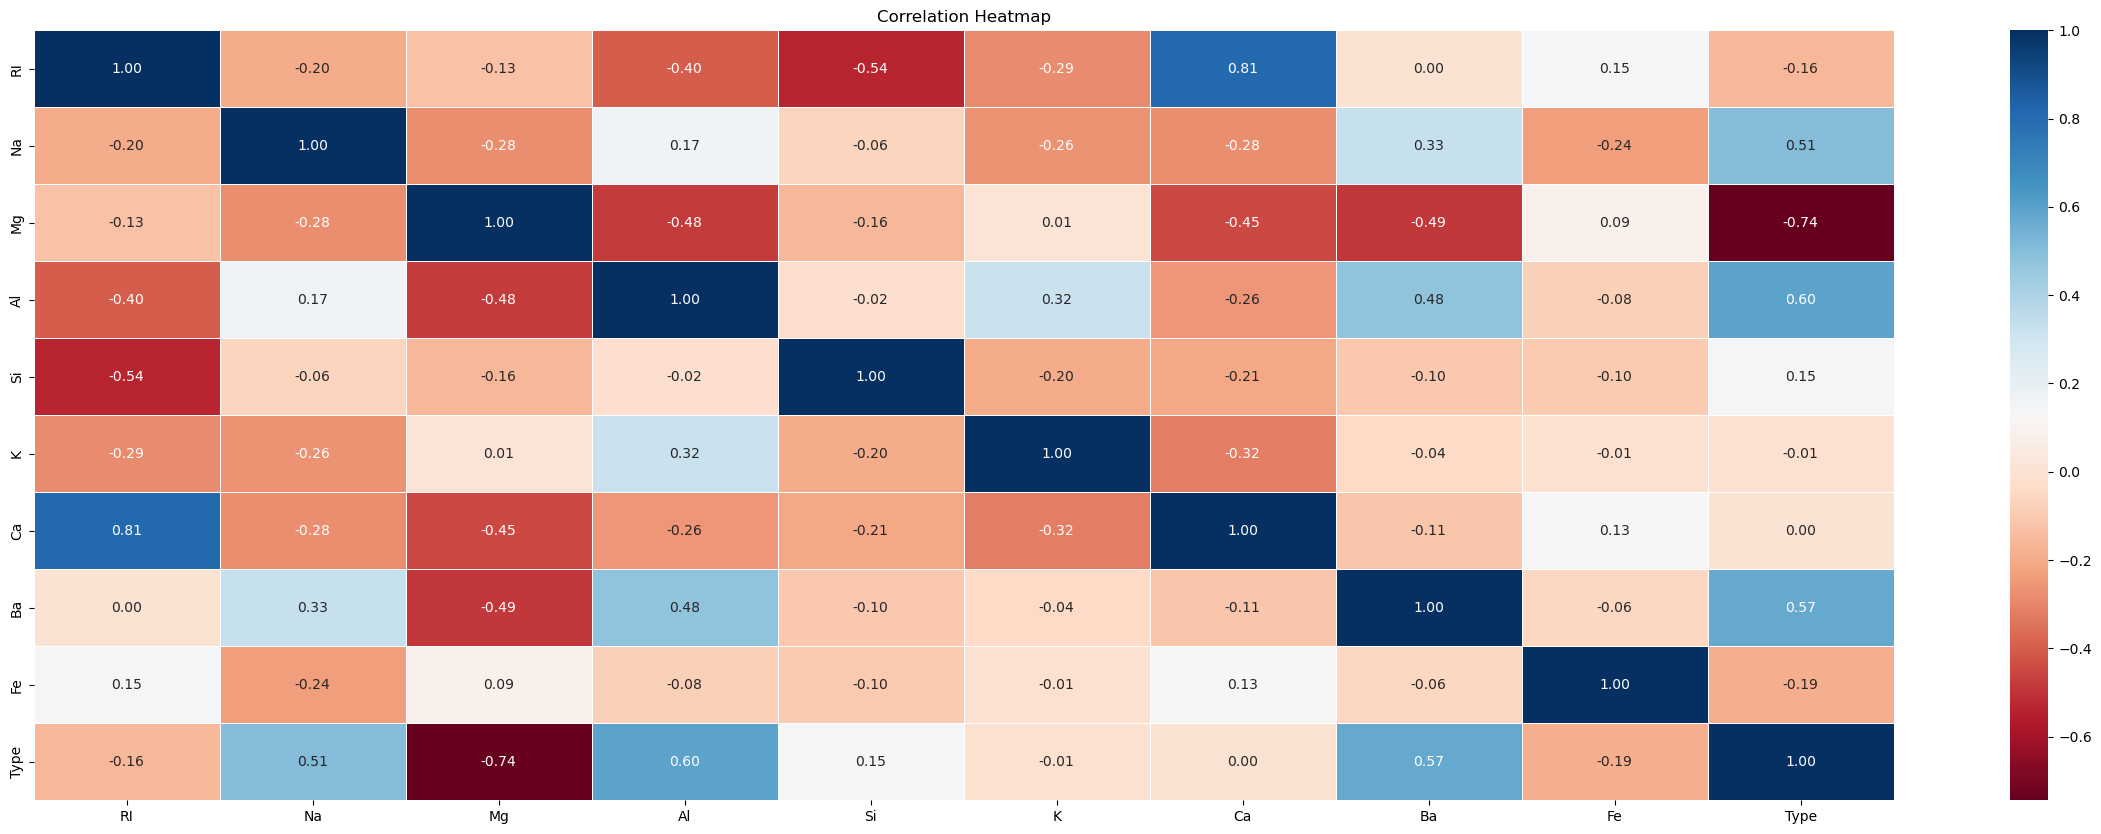

In [11]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

In [12]:
x = df.drop('Type', axis=1) 
y = df['Type']

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:

xgb = XGBClassifier(n_estimators=200, 
                   random_state=42)
xgb.fit(x_train, y_train)
print('Training score:',xgb.score(x_train, y_train))
print('Testing score:',xgb.score(x_test,y_test))

Training score: 1.0
Testing score: 0.9069767441860465


In [16]:
y_pred = xgb.predict(x_test)
target_names = [str(class_name) for class_name in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.88      0.93      0.90        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.91        43
   macro avg       0.92      0.90      0.90        43
weighted avg       0.92      0.91      0.91        43



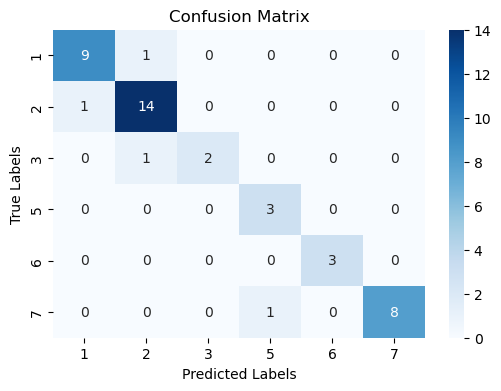

In [17]:
cm = confusion_matrix(y_test, y_pred)

# Convert to DataFrame with class labels
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();

<h2>Deep Learning</h2>

In [18]:
DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
DL_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2301 - loss: 2.1766 - val_accuracy: 0.5116 - val_loss: 1.6868
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4884 - loss: 1.4954 - val_accuracy: 0.5814 - val_loss: 1.7615
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5853 - loss: 1.2496 - val_accuracy: 0.6744 - val_loss: 1.8474
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5790 - loss: 1.1013 - val_accuracy: 0.6977 - val_loss: 1.7758
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6160 - loss: 1.1089 - val_accuracy: 0.7209 - val_loss: 1.6190
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6943 - loss: 0.9306 - val_accuracy: 0.7209 - val_loss: 1.5392
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6513 - loss: 0.9552 - val_accuracy: 0.7209 - val_loss: 1.4950
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6640 - loss: 0.9371 - val_accuracy: 0.6977 - v

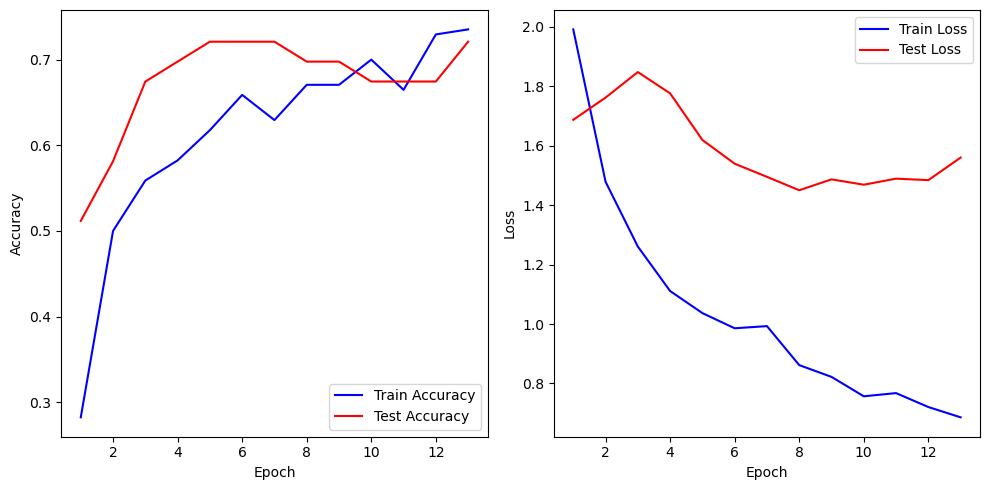

In [19]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [20]:
y_pred = DL_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [21]:
target_names = [str(class_name) for class_name in le.classes_]
cr_DL = classification_report(y_test, y_pred_classes, target_names=target_names)
print(cr_DL)

              precision    recall  f1-score   support

           1       0.69      0.90      0.78        10
           2       0.63      0.80      0.71        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.72        43
   macro avg       0.64      0.58      0.59        43
weighted avg       0.70      0.72      0.70        43



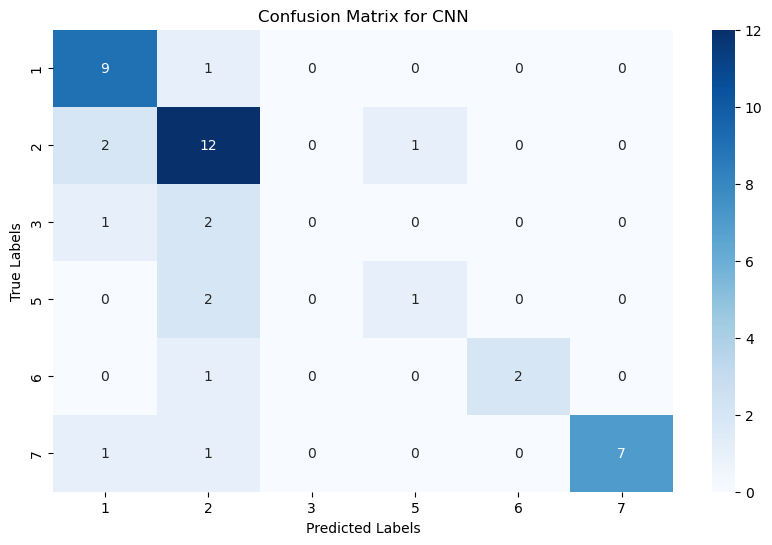

In [22]:
cm_DL = confusion_matrix(y_test, y_pred_classes)

# Convert to DataFrame with class labels
cm_DL = pd.DataFrame(cm_DL, index=target_names, columns=target_names)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_DL, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for CNN")
plt.show()

<h2>Machine Learning vs Deep Learning</h2>

In [23]:
new_data = [[1.5, 13, 3.5, 1.5, 73, 0.6, 8, 0, 0]]
new_data_scaled = sc.transform(new_data)

ML_prediction = xgb.predict(new_data_scaled)
ML_prediction = le.inverse_transform(ML_prediction)

y_pred = DL_model.predict(new_data_scaled)
DL_prediction = np.argmax(y_pred, axis=1)
DL_prediction = le.inverse_transform(DL_prediction)

print("ML Glass Type Prediction:", ML_prediction)
print("DL Glass Type Prediction:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
ML Glass Type Prediction: [2]
DL Glass Type Prediction: [2]
